In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Загрузка изображения

In [2]:
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

ВЫСОКОЧАСТОТНАЯ ФИЛЬТРАЦИЯ

Прямое преобразование Фурье

In [3]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

Амплитудный спектр

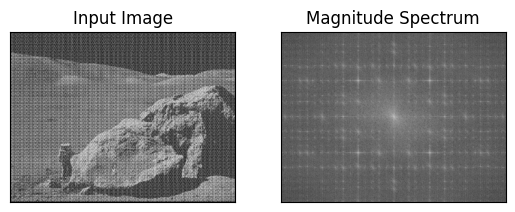

In [4]:
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Создание высокочастотного фильтра

In [5]:
mask_highpass = np.ones((img.shape[0], img.shape[1], 2), np.uint8)
centerX, centerY = int(img.shape[0] / 2), int(img.shape[1] / 2)

Удаляем низкие частоты (создаем "дырку" в центре)

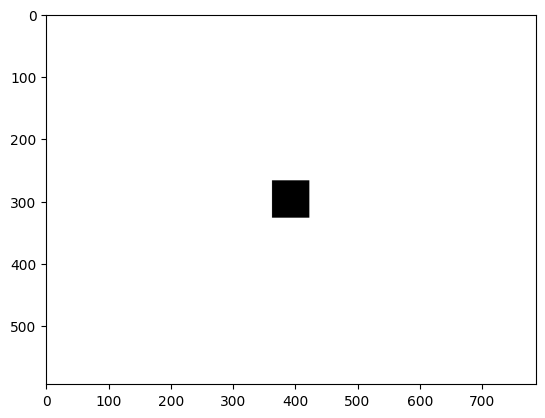

In [6]:
mask_highpass[centerX-30:centerX+30, centerY-30:centerY+30, :] = 0
plt.imshow(mask_highpass[:,:,0], cmap = 'gray')

Применяем высокочастотный фильтр

In [7]:
dft_shift_highpass = dft_shift * mask_highpass

C:\Users\Vova\AppData\Local\Temp\ipykernel_5520\3888608858.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift_highpass[:,:,0],dft_shift_highpass[:,:,1]))


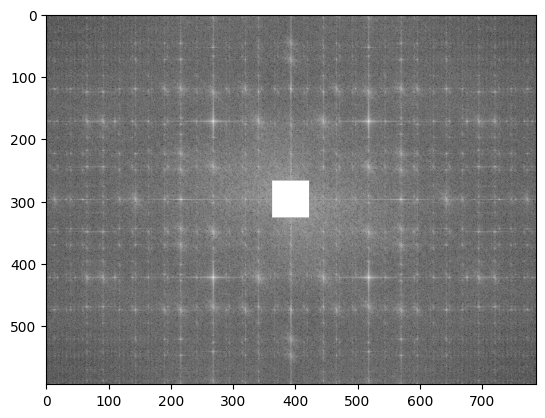

In [8]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift_highpass[:,:,0],dft_shift_highpass[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

Обратное преобразование Фурье для высокочастотного фильтра

In [9]:
f_ishift_highpass = np.fft.ifftshift(dft_shift_highpass)
img_highpass = cv.idft(f_ishift_highpass)
img_highpass = cv.magnitude(img_highpass[:,:,0], img_highpass[:,:,1])

Визуализация высокочастотной фильтрации

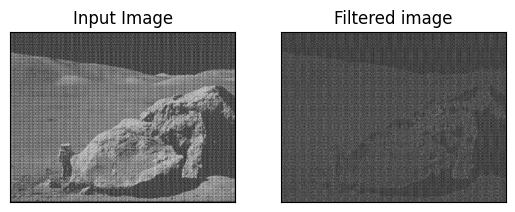

In [10]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_highpass, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

УДАЛЕНИЕ ПЕРИОДИЧЕСКОГО ШУМА

Low pass filter

In [11]:
mask_low = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask_low[centerX-30:centerX+30, centerY - 30:centerY+30,:] = 1

High pass filter

In [12]:
mask_high = np.ones((img.shape[0],img.shape[1],2),np.uint8)
mask_high[centerX-30:centerX+30, centerY - 30:centerY+30,:] = 0

Применяем фильтры

In [13]:
dft_low = dft_shift * mask_low
dft_high = dft_shift * mask_high

Обратное преобразование

In [14]:
def inverse_fourier(dft_data):
    f_ishift = np.fft.ifftshift(dft_data)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

img_low = inverse_fourier(dft_low)
img_high = inverse_fourier(dft_high)

Комбинация для удаления шума

In [15]:
img_combined = (img_low + img_high) / 2

Визуализация

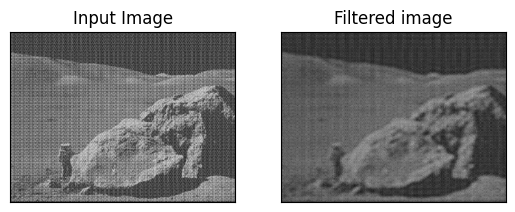

In [16]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_combined, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()